<a href="https://colab.research.google.com/github/ajaythakur3369/CipherByte-Technologies-Internship/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Time Series Forecasting**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota**
## **Submitted To - CipherByte Technologies**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/CipherByte-Technologies-Internship)**

# **Problem Statement -**

Forecast future trends or values based on historical data. You can use time series models like ARIMA or Prophet and evaluate the model using metrics such as RMSE or MAE.

**Dataset -** https://raw.githubusercontent.com/Urnisha2002/CBTCIP/main/TASK3/weather_data_kolkata_2015_2020.csv

# **Let's Begin !**

In [ ]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebook/Internship_Name/CipherByte_Technologies/File_Name/Weather_dataset.csv")

In [ ]:
df.head()

,DATETIME,TEMPERATURE,HUMIDITY
0,2015-01-01 00:00:00,19.0,75.0
1,2015-01-01 01:00:00,19.0,77.0
2,2015-01-01 02:00:00,19.0,78.0
3,2015-01-01 03:00:00,19.0,80.0
4,2015-01-01 04:00:00,19.0,81.0


In [ ]:
df.head(20)

,DATETIME,TEMPERATURE,HUMIDITY
0,2015-01-01 00:00:00,19.0,75.0
1,2015-01-01 01:00:00,19.0,77.0
2,2015-01-01 02:00:00,19.0,78.0
3,2015-01-01 03:00:00,19.0,80.0
4,2015-01-01 04:00:00,19.0,81.0
5,2015-01-01 05:00:00,20.0,83.0
6,2015-01-01 06:00:00,20.0,84.0
7,2015-01-01 07:00:00,20.0,82.0
8,2015-01-01 08:00:00,21.0,80.0
9,2015-01-01 09:00:00,22.0,78.0


In [ ]:
df.tail()

,DATETIME,TEMPERATURE,HUMIDITY
52603,2020-12-31 19:00:00,25.0,36.0
52604,2020-12-31 20:00:00,24.0,37.0
52605,2020-12-31 21:00:00,23.0,38.0
52606,2020-12-31 22:00:00,22.0,39.0
52607,2020-12-31 23:00:00,21.0,40.0


In [ ]:
df.tail(20)

,DATETIME,TEMPERATURE,HUMIDITY
52588,2020-12-31 04:00:00,20.0,48.0
52589,2020-12-31 05:00:00,20.0,48.0
52590,2020-12-31 06:00:00,20.0,49.0
52591,2020-12-31 07:00:00,21.0,44.0
52592,2020-12-31 08:00:00,23.0,40.0
52593,2020-12-31 09:00:00,24.0,36.0
52594,2020-12-31 10:00:00,25.0,32.0
52595,2020-12-31 11:00:00,26.0,28.0
52596,2020-12-31 12:00:00,28.0,25.0
52597,2020-12-31 13:00:00,28.0,25.0


In [ ]:
df

,DATETIME,TEMPERATURE,HUMIDITY
0,2015-01-01 00:00:00,19.0,75.0
1,2015-01-01 01:00:00,19.0,77.0
2,2015-01-01 02:00:00,19.0,78.0
3,2015-01-01 03:00:00,19.0,80.0
4,2015-01-01 04:00:00,19.0,81.0
...,...,...,...
52603,2020-12-31 19:00:00,25.0,36.0
52604,2020-12-31 20:00:00,24.0,37.0
52605,2020-12-31 21:00:00,23.0,38.0
52606,2020-12-31 22:00:00,22.0,39.0


In [ ]:
df.shape

(52608, 3)

In [ ]:
df.dtypes

DATETIME        object
TEMPERATURE    float64
HUMIDITY       float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52608 entries, 0 to 52607
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATETIME     52608 non-null  object 
 1   TEMPERATURE  52608 non-null  float64
 2   HUMIDITY     52608 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,TEMPERATURE,HUMIDITY
count,52608.000000,52608.000000
mean,28.187633,58.871693
std,4.946404,18.935218
min,11.000000,8.000000
25%,25.000000,44.000000
50%,29.000000,60.000000
75%,31.000000,75.000000
max,45.000000,98.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TEMPERATURE,52608.0,28.187633,4.946404,11.0,25.0,29.0,31.0,45.0
HUMIDITY,52608.0,58.871693,18.935218,8.0,44.0,60.0,75.0,98.0


In [ ]:
df.isnull().sum()

DATETIME       0
TEMPERATURE    0
HUMIDITY       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

**Finding out Correlation**

In [ ]:
# Exclude non-numeric columns
numeric_columns = df.select_dtypes(include = ['float64', 'int64'])

# Compute the correlation matrix
corr = numeric_columns.corr()
corr

,TEMPERATURE,HUMIDITY
TEMPERATURE,1.000000,-0.071982
HUMIDITY,-0.071982,1.000000


**Heat Map**

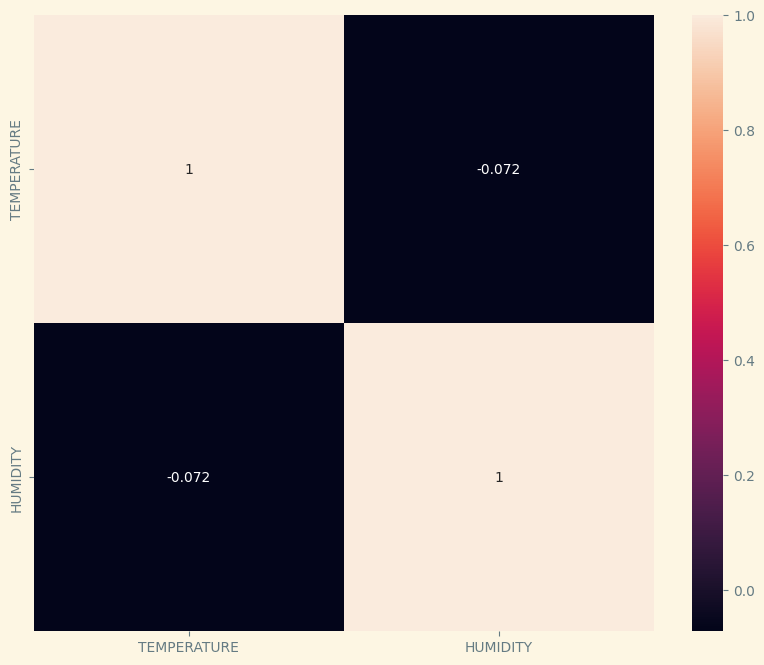

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include = ['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True)
plt.show()

**Inference:**

**"Temperature:"**

The typical temperature is roughly 28.19°C.

The standard deviation of temperature is just 4.95°C.

The temperature range is from 11.0 to 45.0 degrees Celsius.

Temperatures in the middle 50% range from 25.0°C to 31.0°C.

**"Humidity:"**

The relative humidity is about 58.87% on average.

The standard deviation of humidity data is approximately 18.94%.

Humidity levels range from 8.0% to 98.0%.

Humidity levels in the middle 50% range from 44.0% to 75.0%.

**Data Preprocessing**

In [ ]:
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52608 entries, 0 to 52607
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATETIME     52608 non-null  datetime64[ns]
 1   TEMPERATURE  52608 non-null  float64       
 2   HUMIDITY     52608 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.2 MB


In [ ]:
df.head(25)

,DATETIME,TEMPERATURE,HUMIDITY
0,2015-01-01 00:00:00,19.0,75.0
1,2015-01-01 01:00:00,19.0,77.0
2,2015-01-01 02:00:00,19.0,78.0
3,2015-01-01 03:00:00,19.0,80.0
4,2015-01-01 04:00:00,19.0,81.0
5,2015-01-01 05:00:00,20.0,83.0
6,2015-01-01 06:00:00,20.0,84.0
7,2015-01-01 07:00:00,20.0,82.0
8,2015-01-01 08:00:00,21.0,80.0
9,2015-01-01 09:00:00,22.0,78.0


**Inference:**

For each date, there are hourly temperature and humidity readings. It is necessary to compute the average values in order to obtain the date-based mean temperature and mean humidity.

In [ ]:
df['DATE'] = df['DATETIME'].dt.date
df

,DATETIME,TEMPERATURE,HUMIDITY,DATE
0,2015-01-01 00:00:00,19.0,75.0,2015-01-01
1,2015-01-01 01:00:00,19.0,77.0,2015-01-01
2,2015-01-01 02:00:00,19.0,78.0,2015-01-01
3,2015-01-01 03:00:00,19.0,80.0,2015-01-01
4,2015-01-01 04:00:00,19.0,81.0,2015-01-01
...,...,...,...,...
52603,2020-12-31 19:00:00,25.0,36.0,2020-12-31
52604,2020-12-31 20:00:00,24.0,37.0,2020-12-31
52605,2020-12-31 21:00:00,23.0,38.0,2020-12-31
52606,2020-12-31 22:00:00,22.0,39.0,2020-12-31


**Calculating the average temperature and humidity for a group of data using the date.**

In [ ]:
datewise_df = df.groupby('DATE').agg({'TEMPERATURE': 'mean', 'HUMIDITY': 'mean'}).reset_index()
datewise_df

,DATE,TEMPERATURE,HUMIDITY
0,2015-01-01,20.333333,83.208333
1,2015-01-02,23.041667,76.208333
2,2015-01-03,24.375000,76.750000
3,2015-01-04,23.916667,68.250000
4,2015-01-05,21.250000,51.375000
...,...,...,...
2187,2020-12-27,23.083333,28.583333
2188,2020-12-28,23.958333,30.250000
2189,2020-12-29,24.750000,32.458333
2190,2020-12-30,23.875000,34.125000


In [ ]:
datewise_df.shape

(2192, 3)

**Data Visualisation**

In [ ]:
plt.rcParams['figure.figsize'] = (15, 6)
fig = px.line(datewise_df, x = "DATE", y = "TEMPERATURE", title = 'Temperature of Kolkata Over the Years 2015 - 2020', color_discrete_sequence = ['blue'])
fig.show()

In [ ]:
fig = px.line(datewise_df, x = "DATE", y = "HUMIDITY", title = 'Humidity of Kolkata Over the Years', color_discrete_sequence = ['red'])
fig.show()

**Converting the date column to datetime**

In [ ]:
datewise_df['DATE'] = pd.to_datetime(datewise_df['DATE'])

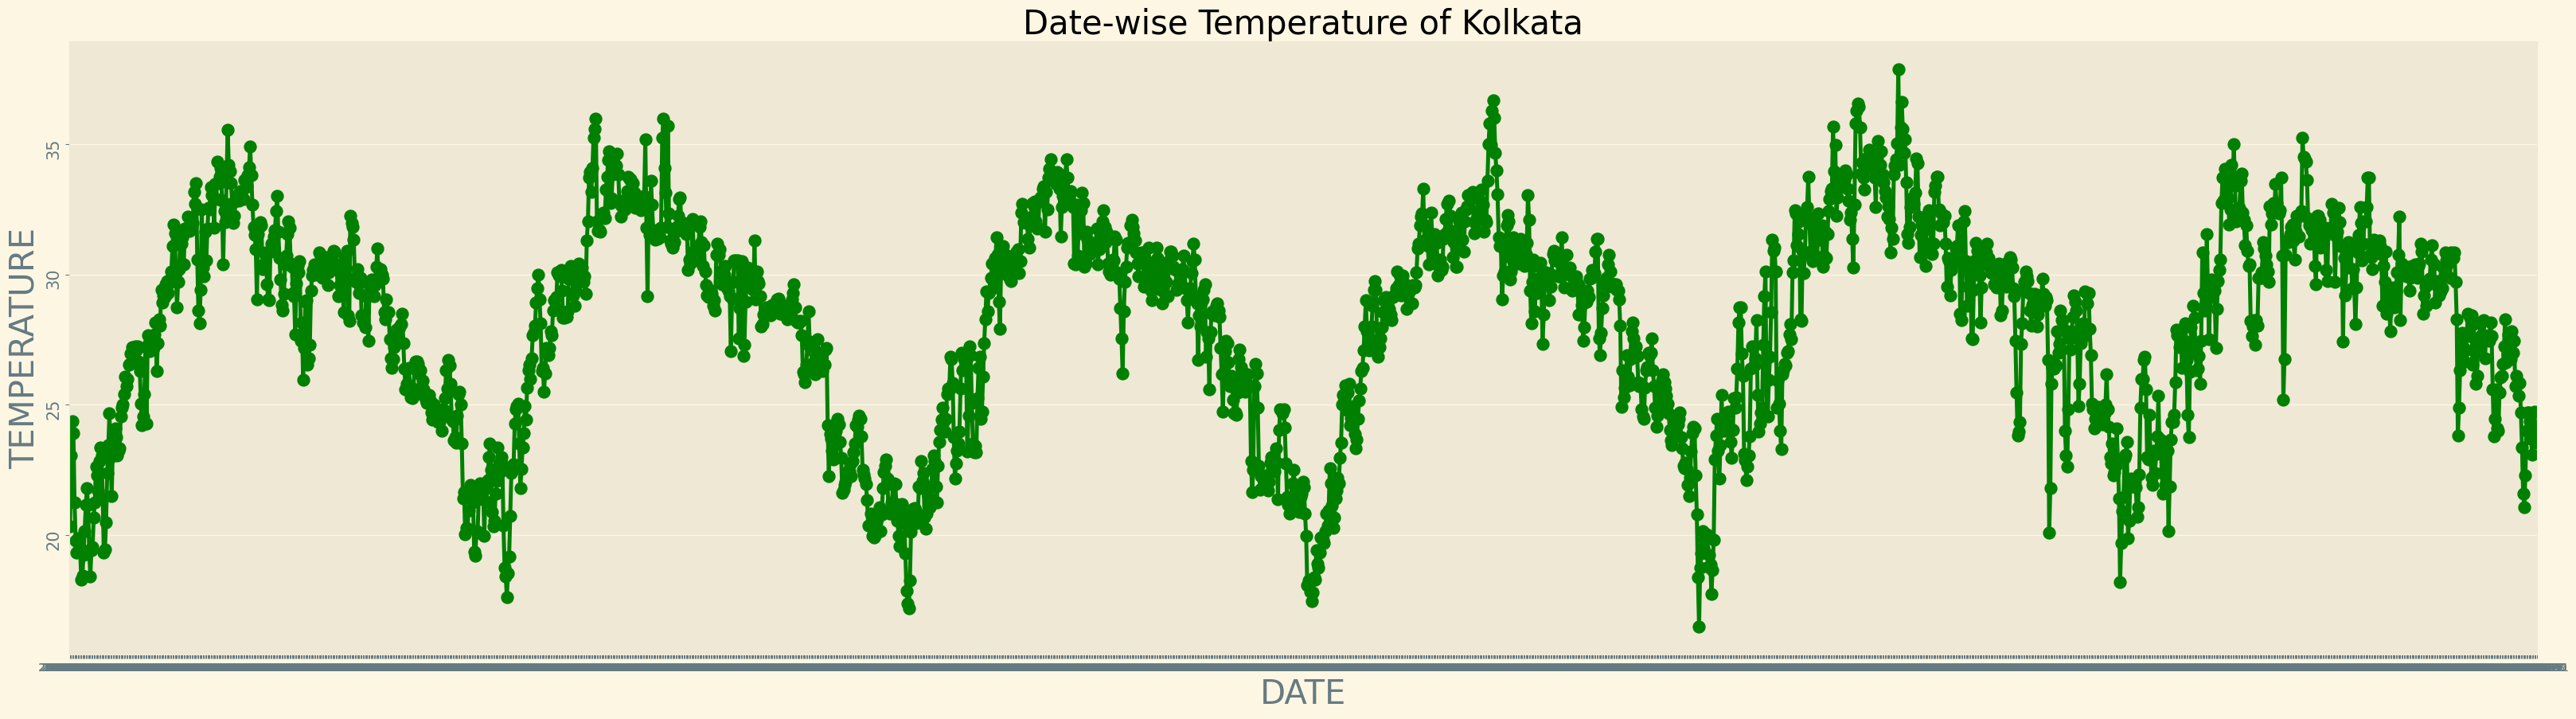

In [ ]:
plt.figure(figsize = (40, 10))
plt.yticks(rotation = 90, fontsize = 15)
plt.xlabel("DATE", fontsize = 30)
plt.ylabel("TEMPERATURE", fontsize = 30)

plt.title("Date-wise Temperature of Kolkata", fontsize = 30)

ax = sns.pointplot(x = datewise_df['DATE'].dt.date, y = datewise_df['TEMPERATURE'], color = 'g')
ax.set(xlabel = "DATE", ylabel = "TEMPERATURE")

plt.show()

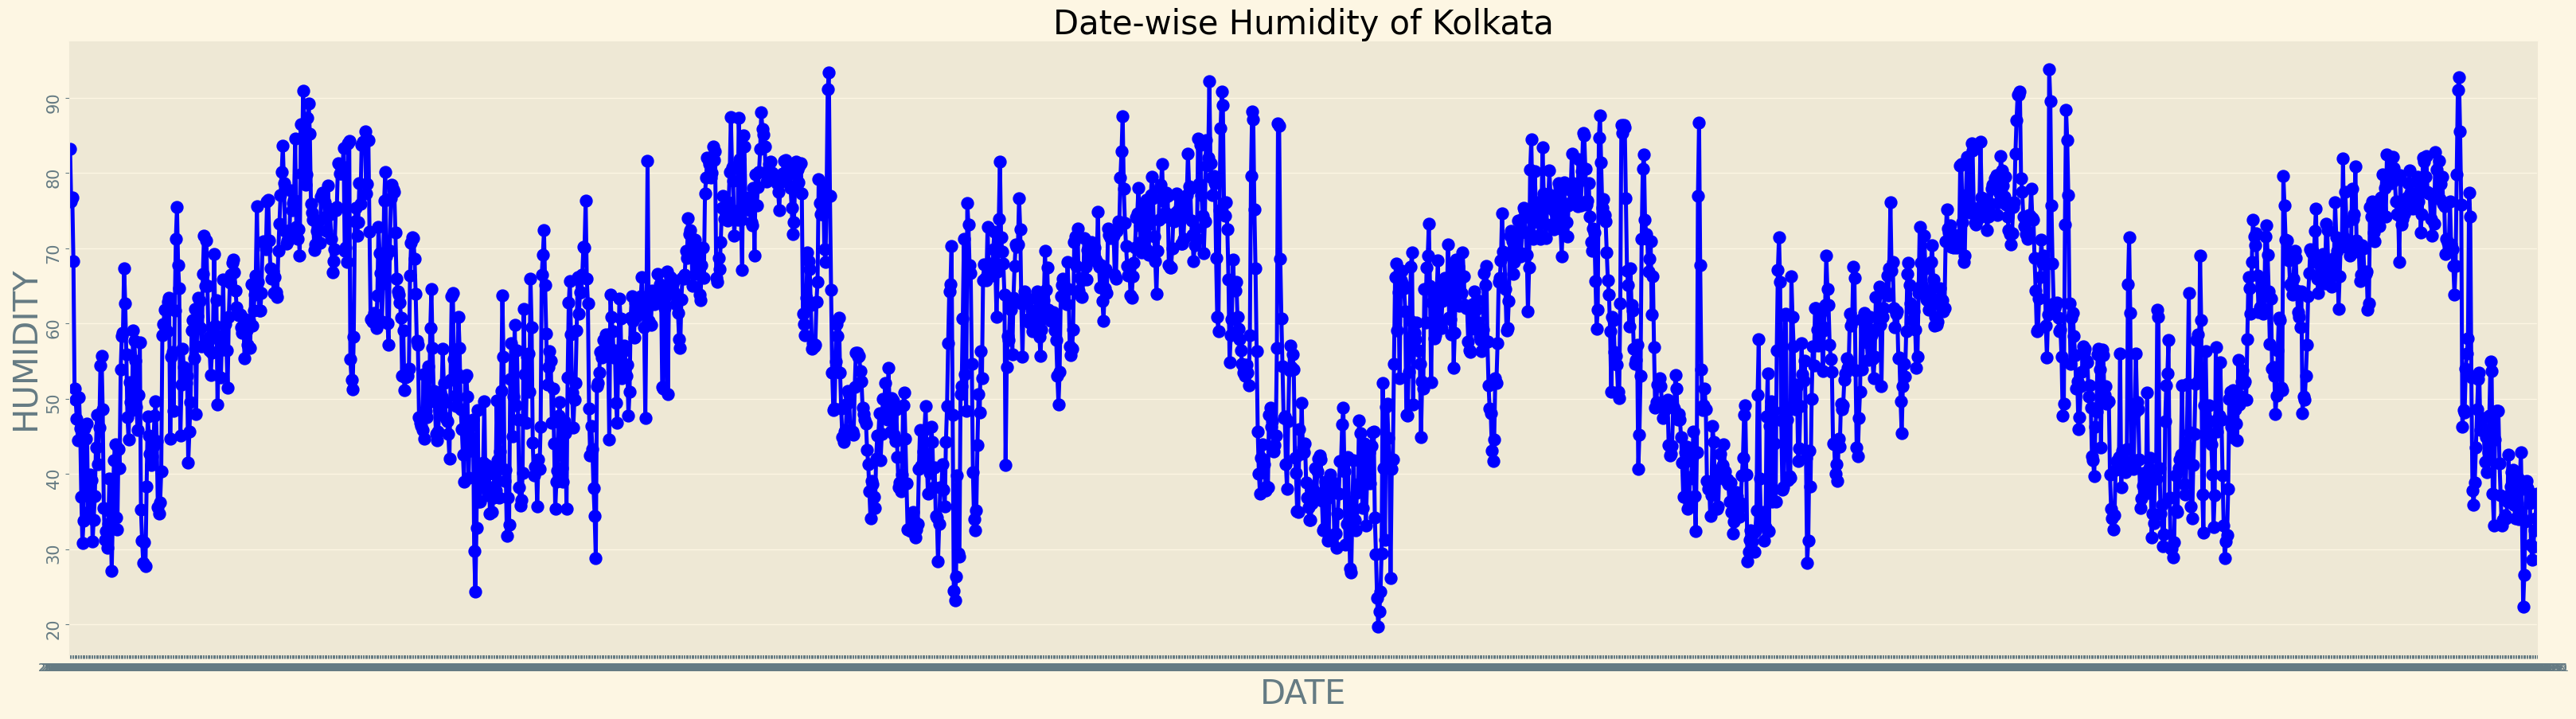

In [ ]:
plt.figure(figsize = (40, 10))
plt.yticks(rotation = 90,fontsize = 15)
plt.xlabel("DATE", fontsize = 30)
plt.ylabel("HUMIDITY", fontsize = 30)

plt.title("Date-wise Humidity of Kolkata", fontsize = 30)

ax = sns.pointplot(x = datewise_df['DATE'].dt.date, y = datewise_df['HUMIDITY'], color = 'b')
ax.set(xlabel = "DATE", ylabel = "HUMIDITY")

plt.show()

**Scatter Plot**

In [ ]:
figure = px.scatter(data_frame = datewise_df, x = "HUMIDITY", y = "TEMPERATURE",
                    trendline = "ols",
                    title = "Relationship Between Temperature and Humidity",
                    color_discrete_sequence = ['red'])
figure.update_traces(line = dict(color = 'green'))
figure.show()

**Inference :**

A relatively favorable association between temperature and humidity is shown in the graph.

**Fetching year and month from the date**

In [ ]:
datewise_df['Year'] = datewise_df["DATE"].dt.year
datewise_df["Month"] = datewise_df["DATE"].dt.month

In [ ]:
datewise_df.head()

,DATE,TEMPERATURE,HUMIDITY,Year,Month
0,2015-01-01,20.333333,83.208333,2015,1
1,2015-01-02,23.041667,76.208333,2015,1
2,2015-01-03,24.375000,76.750000,2015,1
3,2015-01-04,23.916667,68.250000,2015,1
4,2015-01-05,21.250000,51.375000,2015,1


**Plotting changes in temperature over years 2015 - 2020**

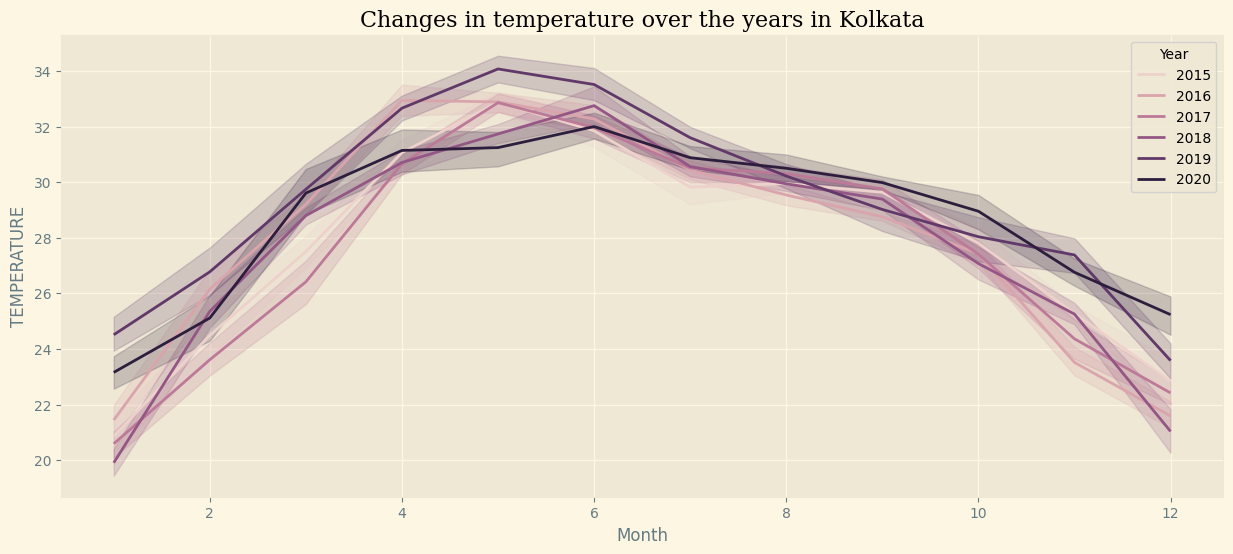

In [ ]:
plt.figure(figsize = (15, 6))
plt.style.use('Solarize_Light2')
plt.title("Changes in temperature over the years in Kolkata", fontname = 'serif', fontsize = 16)
sns.lineplot(data = datewise_df, x = 'Month', y = 'TEMPERATURE', hue = 'Year')
plt.show()

**Plotting changes in humidity over years 2015 - 2020**

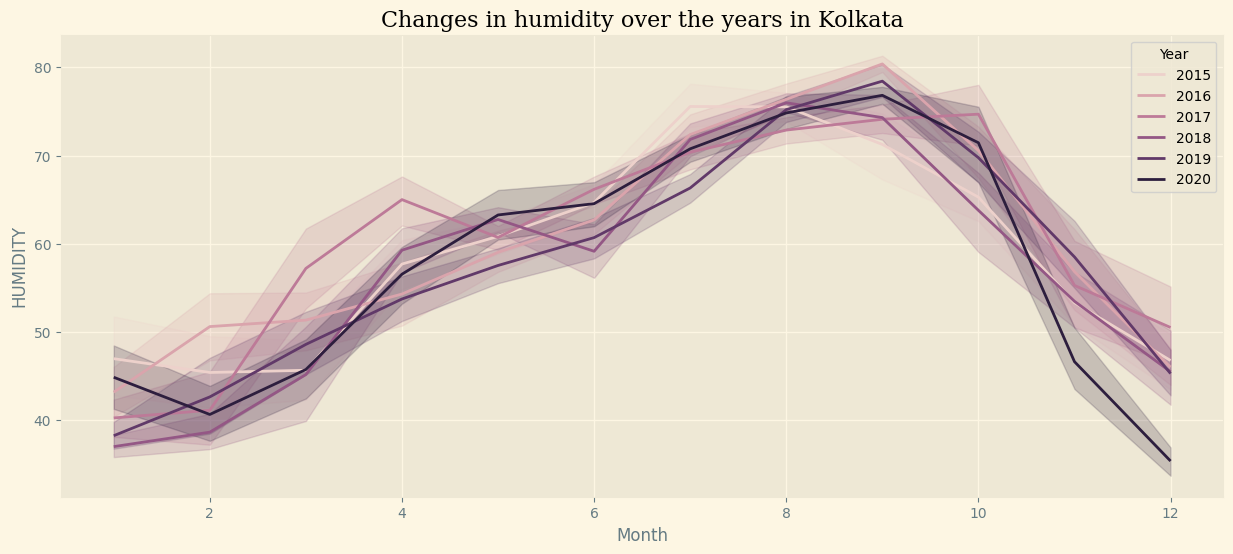

In [ ]:
plt.figure(figsize = (15, 6))
plt.style.use('Solarize_Light2')
plt.title("Changes in humidity over the years in Kolkata", fontname = 'serif', fontsize = 16)
sns.lineplot(data = datewise_df, x = 'Month', y = 'HUMIDITY', hue = 'Year')
plt.show()

**Inferences:**

It is clear that Kolkata experienced lower temperatures and humidity in 2020 than in earlier years.

**Predict Temperature using Prophet**

**Data Preprocessing**

In [ ]:
forecast_df = datewise_df.rename(columns = {"DATE": "ds",
                                       "TEMPERATURE": "y"})

In [ ]:
forecast_df.head()

,ds,y,HUMIDITY,Year,Month
0,2015-01-01,20.333333,83.208333,2015,1
1,2015-01-02,23.041667,76.208333,2015,1
2,2015-01-03,24.375000,76.750000,2015,1
3,2015-01-04,23.916667,68.250000,2015,1
4,2015-01-05,21.250000,51.375000,2015,1


In [ ]:
forecast_temperature_df = forecast_df.drop(['HUMIDITY', 'Year', 'Month'], axis = 1)

In [ ]:
forecast_temperature_df.head()

,ds,y
0,2015-01-01,20.333333
1,2015-01-02,23.041667
2,2015-01-03,24.375000
3,2015-01-04,23.916667
4,2015-01-05,21.250000


**Importing necessary libraries**

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objs as go

In [ ]:
model_t = Prophet()

In [ ]:
model_t.fit(forecast_temperature_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwf389y8r/vxbdtayv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwf389y8r/2sf1at2w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70045', 'data', 'file=/tmp/tmpwf389y8r/vxbdtayv.json', 'init=/tmp/tmpwf389y8r/2sf1at2w.json', 'output', 'file=/tmp/tmpwf389y8r/prophet_model6mda22op/prophet_model-20240528125819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:58:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:58:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecasts_t = model_t.make_future_dataframe(periods = 365)

In [ ]:
predictions_t = model_t.predict(forecasts_t)

In [ ]:
fig_t = plot_plotly(model_t, predictions_t)

In [ ]:
fig_t.update_layout(title = "Temperature Forecast using Prophet")
fig_t.show()

**Model evaluation using RMSE and MAE**

In [ ]:
actual_temp_values = forecast_temperature_df['y'].values

predicted_temp_values = predictions_t['yhat'].values[:len(actual_temp_values)]

rmse = np.sqrt(mean_squared_error(actual_temp_values, predicted_temp_values))
mae = mean_absolute_error(actual_temp_values, predicted_temp_values)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Root Mean Squared Error (RMSE): 1.5064097634234772
Mean Absolute Error (MAE): 1.1299678006141685


Inference:

1. The RMSE value of 1.51 indicates that the predicted values from the model are typically 1.51 units off from the actual values. This low score suggests that the model's forecasts generally match the measured data quite well.

2. The absolute difference between the anticipated and actual values is typically around 1.13 units, according to the MAE value of 1.13. A lower MAE indicates better forecast accuracy.

3. The low RMSE and MAE values imply that the model's predictions are precise and deviate from the actual values very slightly. This suggests that the model and the data are well-matched, and the model is likely doing a good job of forecasting the desired variable.


In [ ]:
forecast_humidity_df = datewise_df[['DATE', 'HUMIDITY']]

In [ ]:
forecast_humidity_df.head()

,DATE,HUMIDITY
0,2015-01-01,83.208333
1,2015-01-02,76.208333
2,2015-01-03,76.750000
3,2015-01-04,68.250000
4,2015-01-05,51.375000


In [ ]:
forecast_humidity_df = forecast_humidity_df.rename(columns={"DATE" : "ds", "HUMIDITY": "y"})

In [ ]:
forecast_humidity_df.head()

,ds,y
0,2015-01-01,83.208333
1,2015-01-02,76.208333
2,2015-01-03,76.750000
3,2015-01-04,68.250000
4,2015-01-05,51.375000


In [ ]:
model_h = Prophet()

In [ ]:
model_h.fit(forecast_humidity_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwf389y8r/y7oo8206.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwf389y8r/i4xgt4rg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81380', 'data', 'file=/tmp/tmpwf389y8r/y7oo8206.json', 'init=/tmp/tmpwf389y8r/i4xgt4rg.json', 'output', 'file=/tmp/tmpwf389y8r/prophet_modelbi1t2xby/prophet_model-20240528125820.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:58:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:58:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecasts_h = model_h.make_future_dataframe(periods = 365)

In [ ]:
predictions_h = model_h.predict(forecasts_h)

In [ ]:
fig_h = plot_plotly(model_h, predictions_h)

In [ ]:
fig_h.update_layout(title = "Humidity Forecast Using Prophet")
fig_h.show()

**Model evaluation using RMSE and MAE**

In [ ]:
actual_humidity_values = forecast_humidity_df['y'].values

In [ ]:
predicted_humidity_values = predictions_h['yhat'].values[:len(actual_humidity_values)]

In [ ]:
rmse = np.sqrt(mean_squared_error(actual_humidity_values, predicted_humidity_values))
mae = mean_absolute_error(actual_humidity_values, predicted_humidity_values)

In [ ]:
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Root Mean Squared Error (RMSE): 8.47388444245433
Mean Absolute Error (MAE): 6.310149354394203


**Inference:**

1. According to the RMSE value of 33.43, the predicted values typically differ from the actual values by about 33.43 units.

2. The MAE value of 30.71 shows that, on average, there are about 30.71 units between the expected and actual values.

3. The results indicate that the model's predictions are somewhat accurate, but there may be room for improvement to further minimize errors.